In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
def drawImg(img):
  plt.imshow(img)

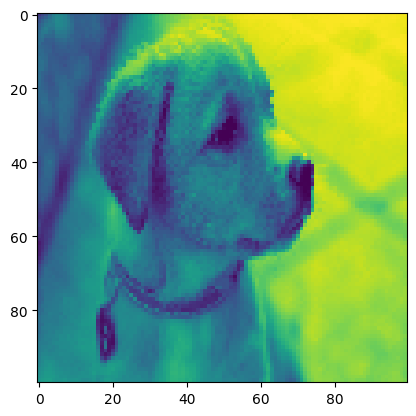

In [ ]:
img=plt.imread('/content/Dog.jpeg')
img_1=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_1=cv2.resize(img_1,(100,100))
drawImg(img_1)

In [ ]:
# convolution function
def convolution(img,img_filter):
  W=img.shape[1]
  H=img.shape[0]
  F=img_filter.shape[0]
  new_img=np.zeros((H-F+1,W-F+1) )  #it will create a new image to replace the values(black image),dimension of new image will be same as actual image

  for row in range(0,H-F+1):
    for col in range(0,W-F+1):
      for i in range(F):
        for j in range(F):
          new_img[row][col]+=img[row+i][col+j]*img_filter[i][j]

          if new_img[row][col]>255:
            new_img[row][col]=255
          elif new_img[row][col]<0:
            new_img[row][col]=0

  return new_img

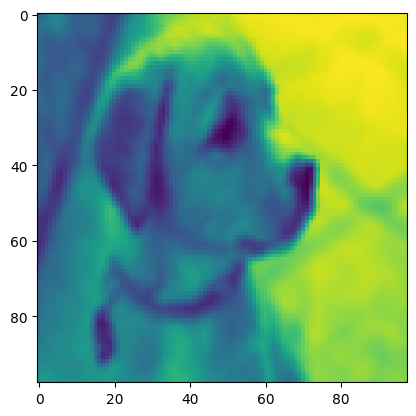

In [ ]:
# Blur
blur_filter=np.ones((3,3))/9.0
blur_filter
output1=convolution(img_1,blur_filter)
drawImg(output1)

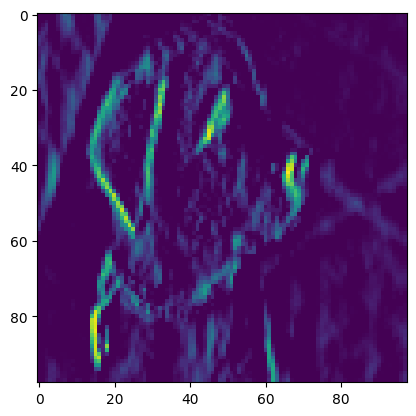

In [ ]:
# edge
edge_filter=np.array([[1,0,-1],
                      [1,0,-1],
                      [1,0,-1]])
output2=convolution(img_1,edge_filter)
drawImg(output2)

DOG VS CAT CLASSIFICATION

In [ ]:
from google.colab import files
!pip install -q kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mallikamuskan","key":"a8a8a71d58780d8f8be44320086e6899"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset

 99% 783M/787M [00:06<00:00, 130MB/s]
100% 787M/787M [00:06<00:00, 122MB/s]


In [ ]:
!unzip /content/kaggle-cat-vs-dog-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5489.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/549.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5490.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5491.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5492.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5493.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5494.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5495.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5496.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5497.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5498.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5499.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/55.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/550.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5500.jpg  
  inflating: kagglecats

start

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from tqdm import tqdm

In [ ]:
path='/content/kagglecatsanddogs_3367a/PetImages'
X=[]
Y=[]

In [ ]:
for folder in os.listdir(path):
  print(folder)

Cat
Dog


In [ ]:
def prep(path,label):
  img=image.load_img(path,target_size=(100,100))
  img=image.img_to_array(img)
  X.append(img)
  Y.append(label)

In [ ]:
for folder in os.listdir(path):
  for img in tqdm(os.listdir(path+folder)):
    final_path=path+folder+'/'+img
    if final_path.endswith(('jpg','png')):
      prep(final_path,folder)

FileNotFoundError: ignored

In [ ]:
len(X),len(Y)

(0, 0)